# Chapter 2: Approaching Simple Linear Regression

## Setting up your working environment

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
califronia = fetch_california_housing()

In [4]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

데이터 Frame화

공용 데이터 셋 받아오기

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 타겟 데이터
    + 1978 보스턴 주택 가격  
    + 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)  
- 특징 데이터  
    + CRIM: 범죄율  
    + INDUS: 비소매상업지역 면적 비율  
    + NOX: 일산화질소 농도  
    + RM: 주택당 방 수  
    + LSTAT: 인구 중 하위 계층 비율  
    + B: 인구 중 흑인 비율  
    + PTRATIO: 학생/교사 비율  
    + ZN: 25,000 평방피트를 초과 거주지역 비율  
    + CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
    + AGE: 1940년 이전에 건축된 주택의 비율  
    + RAD: 방사형 고속도로까지의 거리  
    + DIS: 직업센터의 거리  
    + TAX: 재산세율  

## Representing a normal distribution

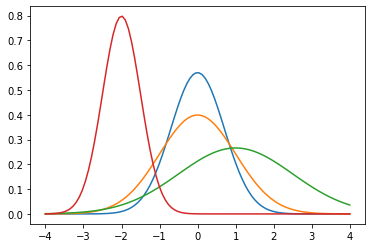

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

x = np.linspace(-4,4,100)
for mean, variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    plt.plot(x,norm.pdf(x,mean,variance))
plt.show()

(평균, 분산) 정규분포 그리기

In [10]:
mean_expected_value=dataset['target'].mean()

Pandas DataFrame에서 가능한 방법을 사용해 평균을 계산하겠다.

In [12]:
np.mean(dataset['target'])

22.532806324110677

Numpy 함수 mean을 호출해 배열로 된 데이터로부터 평균을 계산 할 수도 있다.

In [14]:
Squared_errors=pd.Series(mean_expected_value - \
                       dataset['target'])**2
SSE = np.sum(Squared_errors)
print('Sum of Squared Errors(SSE): %01.f' %SSE)

Sum of Squared Errors(SSE): 42716


오차 제곱함 구하기

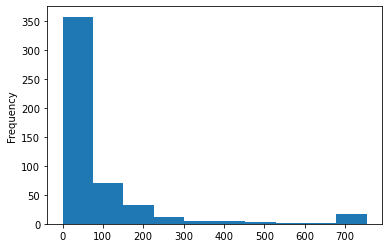

In [16]:
dentsity_plot=Squared_errors.plot(kind='hist')
plt.show()

## Error occured
`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.

when I use Squared_errors.plot('hist') has error 
We can change ('hist') => (kind='hist')

In [18]:
def standardize(x):
    return (x-np.mean(x))/np.std(x)

standardize 함수 정의  
<img src="img2/normalize.png" align="left">    


In [20]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * \
    (variable_2 - np.mean(variable_2)))/(observations-min(bias,1)) 

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias =0) :
    return covariance(standardize(var1),standardize(var2),bias)

from scipy.stats.stats import pearsonr
print('Our correlation estimation : %0.5f' %
     (correlation(dataset['RM'],dataset['target'])))
print('Correlation from Scipy pearsonr estimatino: %0.5f' %
     pearsonr(dataset['RM'],dataset['target'])[0])


Our correlation estimation : 0.69536
Correlation from Scipy pearsonr estimatino: 0.69536


## 공분산 Covariance, 상관계수 Correlation 

<img src = "img2/covariance.png" align = "left">  
<img src = "img2/cor.png" align = "left">
　  
　  


모수인 경우 n 샘플인 경우 n-1  
상관계수는 항상 -1< r <1

<img src = "img2/cor_char.png">

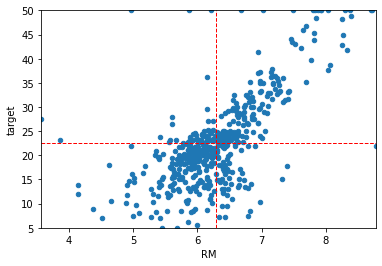

In [22]:
x_range=[dataset['RM'].min(),dataset['RM'].max()]
y_range=[dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter',x='RM',y='target',\
    xlim=x_range,ylim=y_range)
meanY = scatter_plot.plot(x_range,[dataset['target'].mean(),\
    dataset['target'].mean()],'--', color='red',linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),\
    dataset['RM'].mean()],y_range,'--', color='red',linewidth=1)
plt.show()

## Linear regression in action : Statsmodels

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels.api : 별개의 예측 변수 및 응답변수와 함께 작동하며, 절편을 추가 하는 등 예측변수의 변수 변환을 해야한다.  
statsmodels.formula.api : R과 유사한 방법으로 작동하며, 예측 변수의 합 공식과 같은 함수 형태를 지정 할 수 있다.


In [26]:
y=dataset['target']
X=dataset['RM']
X=sm.add_constant(X)

X 변수 상수 값으로 확장 이에 따라 편향이 계산된다.

In [28]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


[최소자승법](https://www.notion.so/cad793b1579c446ba5ff31595b552730)

OLS : 최소자승법 중 하나로 최소 Residual vector를 미분하여 Gradient가 0이 되는 부분을 찾는 방법

In [30]:
linear_regression=sm.OLS(y,X)

In [32]:
fitted_model = linear_regression.fit()

In [34]:
linear_regression = smf.ols(formula='target~RM',data=dataset)
fitted_model = linear_regression.fit()

![공식](img2/캡처.PNG)
* coef : 추정 계수  y=aX+b 에서 coef const 는 b coef RM 은 이다.  
* std err : 계수 추정치의 표준오차로, 값이 크면 클수록 계수 추정치의 불확실성이 높아진다.  
* t : t값 t-value으로, 계수의 참값이 0과 다른지를 나타내는 척도다.    
* P > |t| : 계수가 0이 아닐 확률을 나타내는 p값이다.    
* [95.0% Conf. Interval] : 다른 관찰값과 추정계수가 다를 수 있는 모든 가능성에 대해 계수의 상한값과 하한값 모두 95%로 고려함을 의미한다.

In [36]:
linear_regression=sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.49e-74
Time:                        18:12:48   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Skewnexx(비대칭도)  : 평균 주위 잔차의 대칭을 측정한 것으로, 대칭 분포 잔차의 경우에는 값이 0에 가까워야 한다.
    양수값은 오른쪽으로 긴 꼬리를 나타내고, 음수값은 왼쪽으로 긴 꼬리를 나타낸다.  
* Kurtosis(척도) : 잔차의 분포 모양을 측정한 것으로, 종 모양의 분포이면 0의 값을 갖는다. 음수값은 아주 평평한 분포이고,
    양수값은 매우 뾰족한 분포를 갖는다.
* Omnibus D'Angostino's test : 비대칭도와 첨도를 결합한 통계 테스트  
* Pro(Omnibus) : 옴니버스 통계를 확률로 변환한 것이다.  
* Jarque-Bera(JB) : 비대칭도와 첨도의 또 다른 테스트다.
* Prob(JB) : JB통계를 확률로 변환한 것이다. 
* Durbin-Waston : 잔차 사이의 상관관계 여부를 나타내는 테스트다. 시간 기반 데이터 분서고가 관련이 있다.   
* Cond.No: 다중공선성에 대한 테스트다. 여러 개의 예측변수를 작업 할 때 다룰 것이다.

*R-squared* : 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다. 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킨다. 결정계수의 통상적인 기호는 R²이다. 일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 들어갈수록 증가하기 때문에 해석에 주의해야 한다. 결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워진다. 즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있다.

In [38]:
print(fitted_model.params)
betas =np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


In [40]:
mean_sum_squared_errors =np.sum((dataset['target']-\
    dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target']-\
    fitted_values)**2)
(mean_sum_squared_errors -\
    regr_sum_squared_errors) / mean_sum_squared_errors

0.4835254559913341

In [42]:
from scipy.stats.stats import pearsonr
(pearsonr(dataset['RM'],dataset['target'])[0])**2

0.4835254559913339

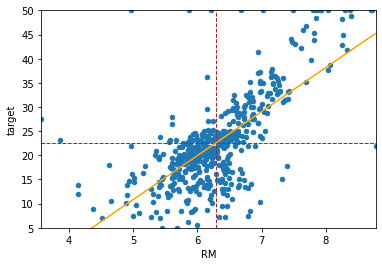

In [44]:
x_range=[dataset['RM'].min(),dataset['RM'].max()]
y_range=[dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter',x='RM',y='target',\
    xlim=x_range,ylim=y_range)
meanY = scatter_plot.plot(x_range,[dataset['target'].mean(),\
    dataset['target'].mean()],'--', color='red',linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),\
    dataset['RM'].mean()],y_range,'--', color='red',linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values,\
                                   '-', color = 'orange', linewidth=1)
plt.show()

t 값 : 두 표본의 평균의 차이  
f 값 : t-value와 비슷 벗 약간의 차이를 두고 계산함  
p 값 : t-value를 확률로 표시함  
[상세 설명](https://www.notion.so/dcbd894c2689491599903fda70b67abe)



## Linear regression in action : Scikit-learn

In [46]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [48]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
y = dataset['target'].values # y can be a vector

In [50]:
linear_regression.fit(X,y) #Fit 모델을 적합시킬때 사용

LinearRegression()

In [52]:
print (linear_regression.coef_)
print (linear_regression.intercept_)

[9.10210898]
-34.67062077643857


In [54]:
print (linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [56]:
Xp = np.column_stack((X,np.ones(observations)))
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]

In [58]:
np.dot(Xp,v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

In [60]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=101)

In [62]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

Wall time: 676 ms


LinearRegression()

In [64]:
%%time
sm_linear_regression = sm.OLS(Hy,sm.add_constant(HX))
sm_linear_regression.fit()

Wall time: 3.89 s


## Cost function of a linear regression model

![costfun](img2/costfun.PNG)  
위와 같이 h(x) 회귀 함수 h가 산정되고

![costfun1](img2/costfun1.PNG)  
비용함수 cost function이 다음과 같이 최소화 된다. 밑에 예제를 들어 설명해보겠다.

In [66]:
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [68]:
def squared_cost(v,e):
 return np.sum((v-e)**2)

xtol : 소숫점 자릿수 표현 하는 곳을 말함즉 float option이다  
fmin 나머지 설명 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

In [70]:
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,)) 

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [72]:
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The mean is %0.1f' % (np.mean(x)))

The result of optimization is 7.8
The mean is 7.8


제곱의 차이의 최솟값은 벡터의 평균과 동일하다.

절대 오차의 합계를 최소화 하는 것은 무엇인지도 알아보자

In [74]:
def absolute_cost(v,e):
 return np.sum(np.abs(v-e))
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The median is %0.1f' % (np.median(x)))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88
The result of optimization is 8.0
The median is 8.0


이것의 평군값이 아니라 중앙 값인 겂을 알 수 있다.

## Cost function minimization  
![pseudo](img2/pseudo.PNG)  
상수 벡터 X가 항상 역을 가지는 것이 아니므로 가중치 w에 값을 구하기가 쉽지않다. 이때 pseudo Inverse를 통해 역을 구해 w값을 구해보자 (X^T*X가 역변환 가능하다는 가정하에)

In [76]:
observations = len(dataset)
X  = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
Xb = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

def matrix_inverse(X,y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)),np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

print (matrix_inverse(Xb, y))
print (matrix_inverse(Xb, y, pseudo=True))
print (normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


## Gradient descent at work  

![Gradient](img2/gradient1.PNG)  
　  
비용함수를 미분하기 무작위 w에 대해 초기화를 계속함 이를 통해 J(w)값이 최적의 최솟값에 도달할 때 까지 업데이트함  
　  

![Gradient](img2/gradient2.PNG)  
　  
편미분하여 0이 되는 값을 찾아보자. 이때 알파 값이 겁나 중요하다. 알파값에 따라 학습률이 결정 되거나 실패할 수도 있기 때문이다.


In [78]:
observations = len(dataset)
X  = dataset['RM'].values.reshape((observations,1)) # X는 항상 행렬이어야 한다. 벡터가 되어서는 안된다.
X = np.column_stack((X,np.ones(observations))) # 바이어스를 추가한다.
y  = dataset['target'].values # y값은 벡터일 수 도 있다.

In [80]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta): # new_SSL에 오차율안에 들어오면 저장
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0: #반복 20번 마다 저장
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.01
w, path = optimize(X,y,alpha, eta = 10**-12, iterations = 25000) #iterations 반복횟수 eta = 
print ("These are our final coefficients: %s" % w)
print ("Obtained walking on this path of squared loss %s" % path)

# w 값은 앞에서 측정한 값으로 추정계수로 지정한다. w = [9.10210898, -34.67062078]

These are our final coefficients: [8.8417213470688, -33.01426430759394]
Obtained walking on this path of squared loss [93223.09577306516, 27231.87212322741, 25889.574671933427, 24895.78107222796, 24160.00844756605, 23615.266203942923, 23211.956673197732, 22913.359346674908, 22692.287547945416, 22528.613141470953, 22407.433906992694, 22317.716722827885, 22251.29302268553, 22202.115064397243, 22165.705295350617, 22138.748680473334, 22118.790875063707, 22104.014761720762, 22093.075005518018, 22084.975564007378]


끝(chapter2)
